In [11]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from typhoon_ocr import ocr_document

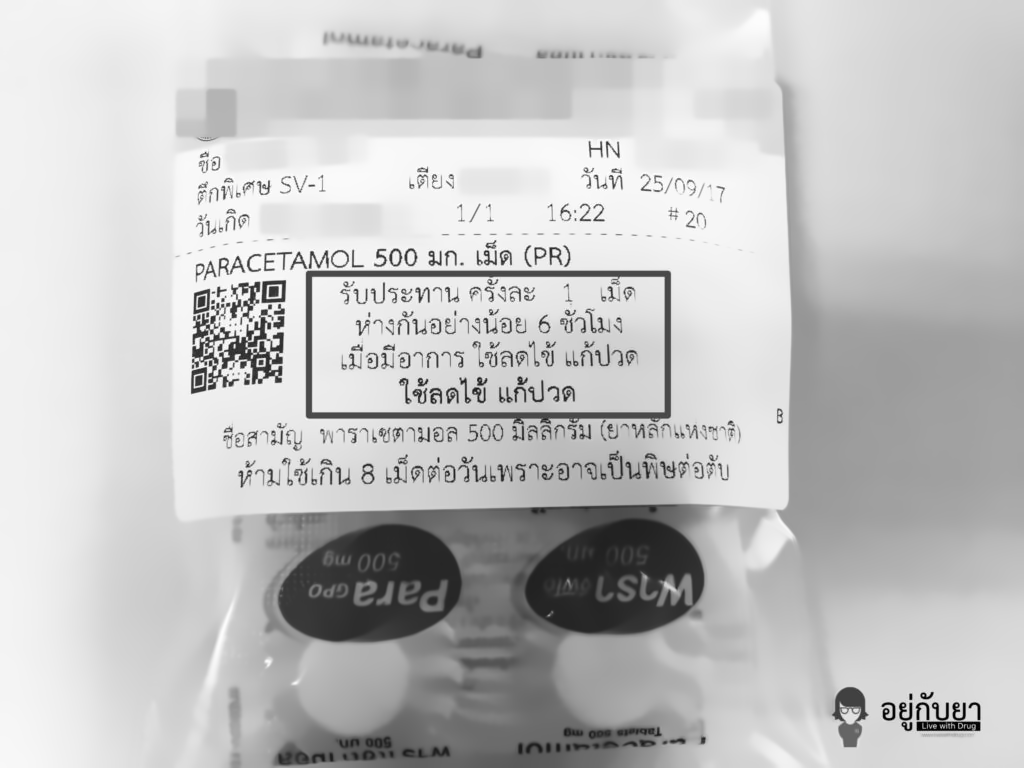

In [12]:
img_name = '../images/para.jpg'
img = cv2.imread(img_name)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Denoise
gray = cv2.fastNlMeansDenoising(gray, h=12)

checkimg = Image.fromarray(gray).convert("RGB")
checkimg

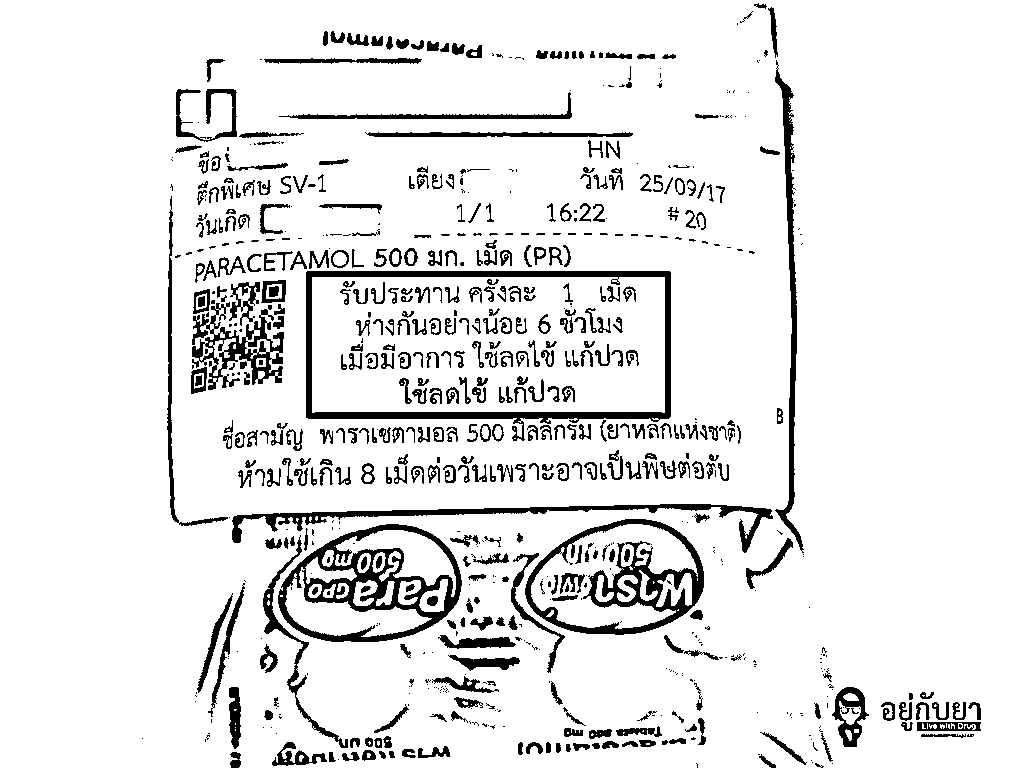

In [ ]:
mean_val = np.mean(gray)

# Invert if background is dark
if mean_val < 127:
    gray = cv2.bitwise_not(gray)

# Adaptive threshold
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

# Morphology
kernel = np.ones((1,1), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

final = Image.fromarray(clean).convert("RGB")
final


In [14]:
final.save('./output.png')

In [ ]:
import requests
import json

def extract_strings_from_json(obj):
    """Recursively extract all string values from a JSON object."""
    texts = []
    if isinstance(obj, dict):
        for v in obj.values():
            texts.extend(extract_strings_from_json(v))
    elif isinstance(obj, list):
        for item in obj:
            texts.extend(extract_strings_from_json(item))
    elif isinstance(obj, str):
        texts.append(obj)
    return texts

def extract_text_from_image(image_path, api_key, params):
    url = "https://api.opentyphoon.ai/v1/ocr"
    
    with open(image_path, 'rb') as file:
        files = {'file': file}
        data = {'params': json.dumps(params)}
        headers = {'Authorization': f'Bearer {api_key}'}
        
        response = requests.post(url, files=files, data=data, headers=headers)
        
        if response.status_code == 200:
            result = response.json()
            extracted_texts = []
            
            for page_result in result.get('results', []):
                if page_result.get('success') and page_result.get('message'):
                    content = page_result['message']['choices'][0]['message']['content']
                    try:
                        parsed_content = json.loads(content)
                        # Flatten all text in JSON
                        text_parts = extract_strings_from_json(parsed_content)
                        text = "\n".join(text_parts).strip()
                    except json.JSONDecodeError:
                        # If plain string, just take it
                        text = content.strip()
                    extracted_texts.append(text)
                elif not page_result.get('success'):
                    print(f"Error processing {page_result.get('filename', 'unknown')}: {page_result.get('error', 'Unknown error')}")
            
            return "\n".join(extracted_texts)
        else:
            print(f"Error: {response.status_code}")
            print(response.text)
            return None
# Usage
api_key = "sk-vUdSzgOwfs1Ef48co0Wu8Go8hNkG4brM1OVoIXDBoLSjedED"
image_path = "output.png"  # or path/to/your/document.pdf
model = "typhoon-ocr-preview"
params = {
        "model": model,
        "task_type": "default",
        "max_tokens": 2048,
        "temperature": 0.01,
        "top_p": 0.1,
        "repetition_penalty": 1.1,
    }
extracted_text = extract_text_from_image(image_path, api_key, params)
print(extracted_text)

# เบื้องต้น

## ข้อมูลพิเศษ SV-1
- เดือน: 1/1
- วัน: 25/09/17
- ช่วงเวลา: 16:22
- # 20

## PARACETAMOL 500 มก. เม็ด (PR)
- รับประทาน ครั้งละ 1 เม็ด
- ห่างกันอย่างน้อย 6 ชั่วโมง
- เมื่อมีอาการ ใช้ลดไข้ แก้ปวด
- ใช้ลดไข้ แก้ปวด

### ข้อสังเกต
- ชื่อสามัญ: พาราเซตามอล 500 มิลลิกรัม (ยาหลักแห่งชาติ)
- ห้ามใช้เกิน 8 เม็ดต่อวันเพราะอาจเป็นพิษต่อตับ
